# Ćwiczenie 4
Celem ćwiczenia jest praktyczne wypróbowanie działania filtrów w celu wyeliminowania niepożądanych zakłóceń z sygnału EKG.
Proszę wybrać rodzaj filtra do eksperymentowania, np. Butterwortha lub Czebyszewa. 
Do filtracji wykorzystać gotowe funkcje z biblioteki scipy.signal.
Biblioteka posiada również funkcje wspomagające projektowanie filtrów, które można zastosować.
1. Wczytaj sygnał ekg noise.txt i zauważ zakłócenia nałożone na sygnał. Wykreślić
częstotliwościową charakterystykę amplitudową sygnału.
2. Zbadaj filtr dolnoprzepustowy o częstotliwości granicznej 60 Hz w celu redukcji
zakłóceń pochodzących z sieci zasilającej. Wyznacz parametry filtra, wykreśl
jego charakterystykę (zależność tłumienia od częstotliwości), przebieg sygnału
po filtracji oraz jego widmo. Można też wyznaczyć różnicę między sygnałem
przed i po filtracji i widmo tej różnicy.
3. Zastosuj następnie, do sygnału otrzymanego w punkcie 2, filtr górnoprzepustowy
o częstotliwości granicznej 5 Hz w celu eliminacji pływania linii izoelektrycznej.
Sporządź wykresy sygnałów jak w punkcie 2.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sci
import os

In [ ]:
if os.name == 'nt':
    file_name = "../src/"+input("Podaj nazwe pliku z danymi: ")
elif os.name == 'posix':
    file_name = "..//src//"+input("Podaj nazwe pliku z danymi: ")
else:
    print("Nieznany system")
data_frame = pd.read_csv(file_name,sep="\s+",header=None,engine="python")

print(data_frame)

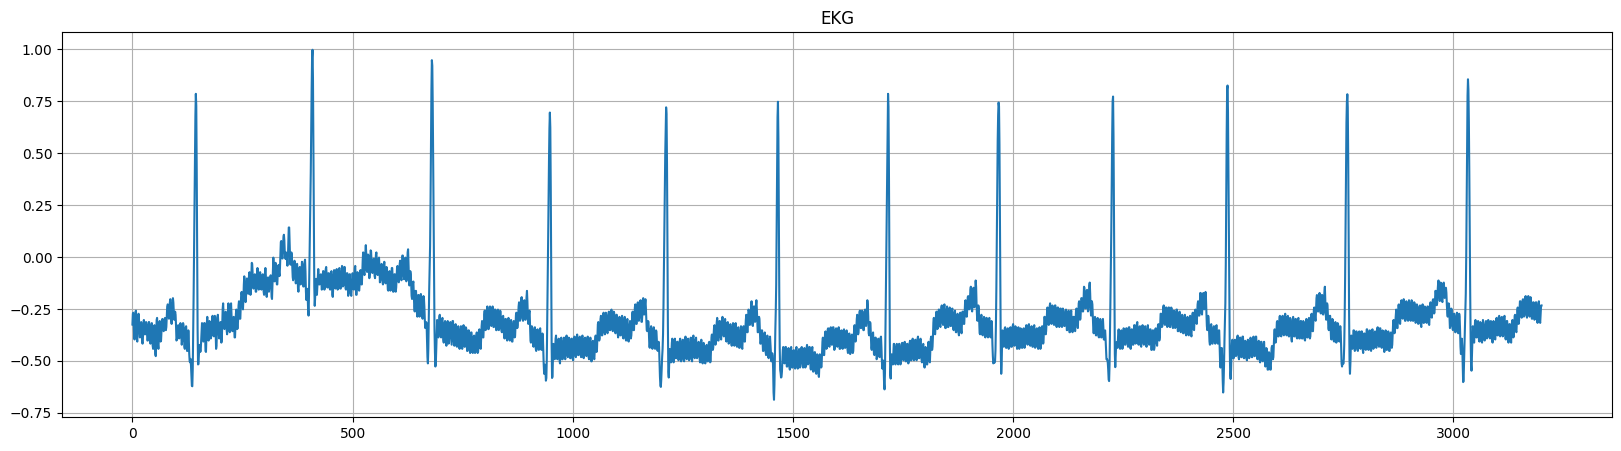

In [21]:
#Wykres EKG (Na podstawie pobranych danych) w zakresie start : end
num_rows = len(data_frame)
start = input("Początek zakresu(Minimalnie 0): ")
end = input("Koniec zakresu(Maksymalnie "+str( num_rows )+"): ")
if start == "":
    start = 0
if end == "":
    end = num_rows
start = int(start)
end = int(end)

data_frame.columns = ['I','data']
new_data = data_frame.iloc[int( start ):int( end )].copy()
font = {'size':20}
plt.figure(figsize=(20,5))
plt.plot(new_data['data'])
plt.grid(True)
plt.title("EKG")
plt.show()

### Zadanie 1
Wyznaczono widmo amplitudowe, na którego podstawie będą weryfikowane działania filtrów.

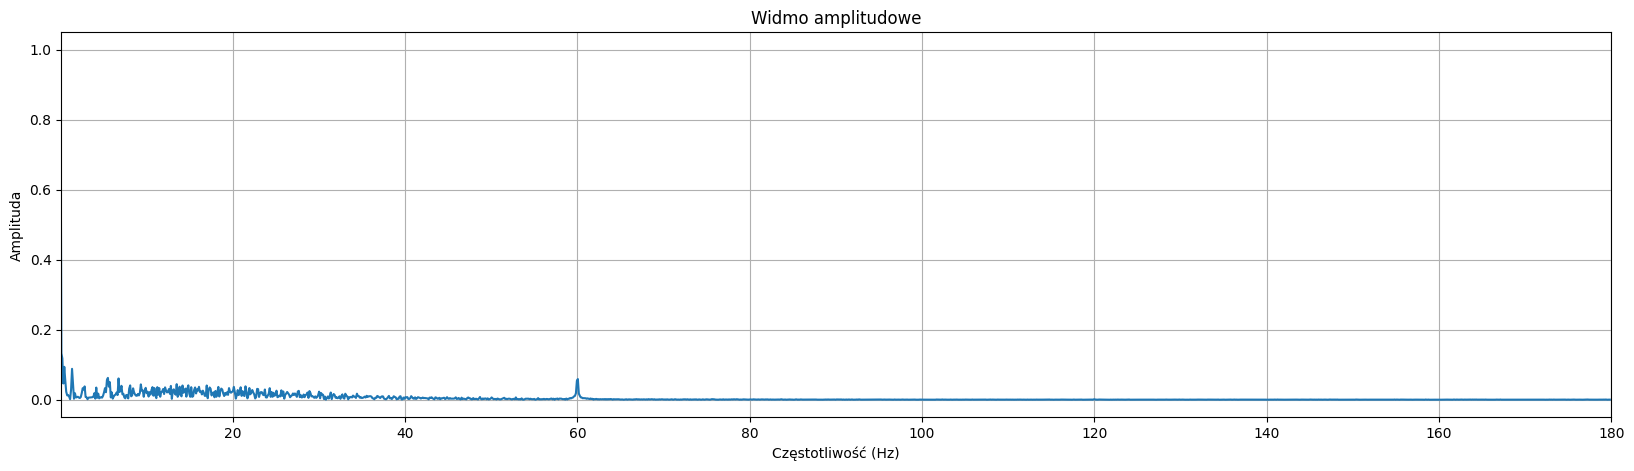

In [14]:
#Generacja i wyświetlenie widma sygnału
fs = 360
t = len(data_frame)

fourier1 = np.fft.fft(data_frame['data'])

widmo = np.abs(fourier1)
abs_widmo = widmo / np.max(widmo)
freq = np.fft.fftfreq(t,1/fs)
pos_freq = freq[:len(freq)//2]
pos_widmo = abs_widmo[:len(abs_widmo)//2]

plt.figure(figsize=(20,5))
plt.plot(pos_freq,pos_widmo)
plt.xlim(left = 0.1, right = fs/2)
plt.grid(True)
plt.title("Widmo amplitudowe")
plt.xlabel('Częstotliwość (Hz)')
plt.ylabel('Amplituda')

plt.show()

### Zadanie 2
Przedstawiono graficznie działanie filtru dolnoprzepustowego o częstotliwości graninczej 60Hz

Następnie przedstawiono dane pierwotne sygnału oraz dane które zostały przetworzone przy pomocy filtru na jednym wykresie w celu łatwego zindentyfikowania różnic w przebiegu sygnału\
Wyświetlono również widmo przetworzonego sygnału w celu dalszej analizy

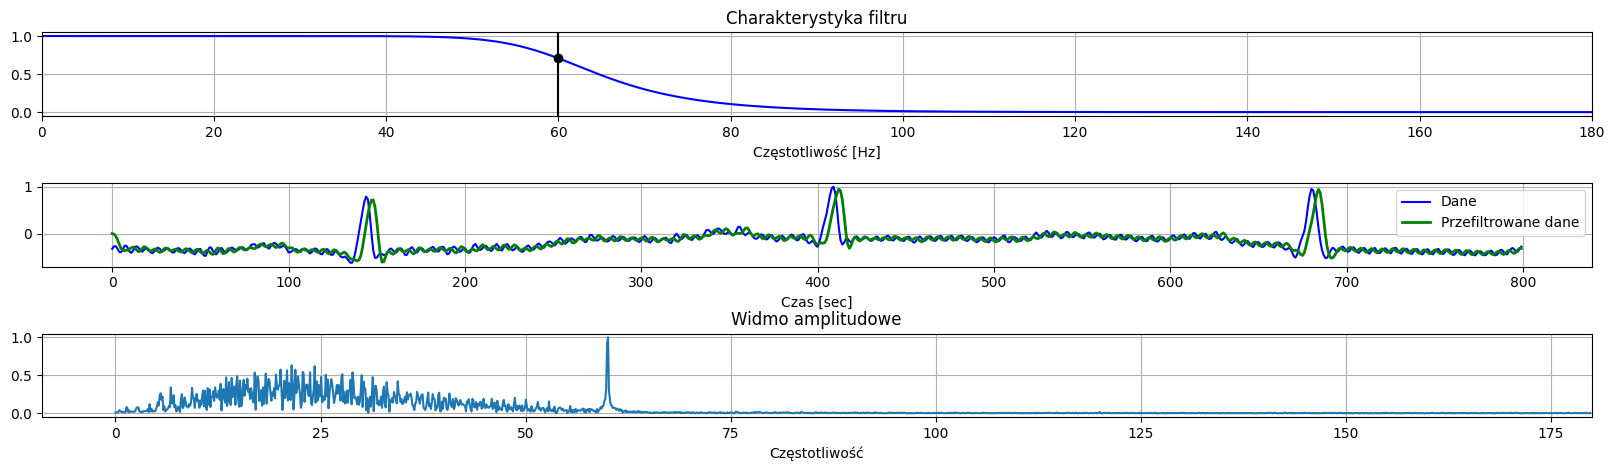

In [9]:
#Zastosowanie dolnoprzepustowego filtru Butterwortha
order = 6
fs = 360
cutoff = 60  

b,a = sci.butter(order,cutoff,fs=fs,btype='low',analog=False)

w, h = sci.freqz(b, a, fs=fs, worN=8000)

plt.figure(figsize=(20,5))
plt.subplot(3, 1, 1)
plt.plot(w, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Charakterystyka filtru")
plt.xlabel('Częstotliwość [Hz]')
plt.grid()

y = sci.lfilter(b, a, data_frame['data'])

plt.subplot(3, 1, 2)
plt.plot(data_frame['data'][start:end] , 'b-', label='Dane')
plt.plot( y[start:end], 'g-', linewidth=2, label='Przefiltrowane dane')
plt.legend()
plt.xlabel('Czas [sec]')
plt.grid()

fourier1 = np.fft.fft(data_frame['data']-y)

widmo = np.abs(fourier1)
abs_widmo = widmo / np.max(widmo)
freq = np.fft.fftfreq(t,1/fs)
pos_freq = freq[:len(freq)//2]
pos_widmo = abs_widmo[:len(abs_widmo)//2]

plt.subplot(3,1,3)
plt.plot(pos_freq,pos_widmo)
plt.xlim(right = fs/2)
plt.grid(True)
plt.title("Widmo amplitudowe")
plt.xlabel('Częstotliwość')

plt.subplots_adjust(hspace=0.8)
plt.show()


### Zadanie 3
Po wyznaczeniu przebiegu sygnału po zastosowaniu filtruu dolnoprzepustowego, wyznaczono charakterystykę filtru górnoprzepustowego o wartości granicznej 5Hz\
Sporządzono wykres, porównójący różnice z przebiegiem z zadania 2 oraz zwizualizowano widmo aplitudowe po zastosowaniu drugiego filtra.

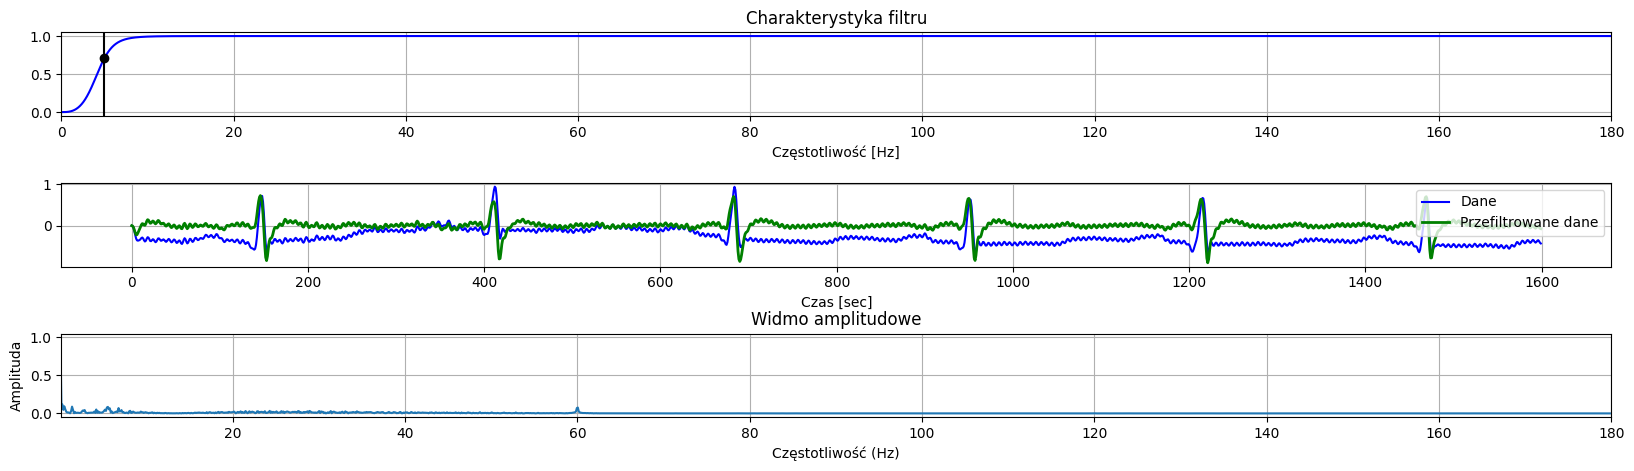

In [20]:
#Zastosowanie górnoprzepustowego filtru Butterwortha
order = 3
fs = 360
cutoff = 5

b,a = sci.butter(order,cutoff,fs=fs,btype='hp',analog=False)

w, h = sci.freqz(b, a, fs=fs, worN=8000)
hy = sci.lfilter(b, a, y)

plt.figure(figsize=(20,5))

plt.subplot(3, 1, 1)
plt.plot(w, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Charakterystyka filtru")
plt.xlabel('Częstotliwość [Hz]')
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(y[start:end] , 'b-', label='Dane')
plt.plot( hy[start:end], 'g-', linewidth=2, label='Przefiltrowane dane')
plt.legend()
plt.xlabel('Czas [sec]')
plt.grid()

fourier1 = np.fft.fft(data_frame['data']-hy)

widmo = np.abs(fourier1)
abs_widmo = widmo / np.max(widmo)
freq = np.fft.fftfreq(t,1/fs)
pos_freq = freq[:len(freq)//2]
pos_widmo = abs_widmo[:len(abs_widmo)//2]

plt.subplot(3,1,3)
plt.plot(pos_freq,pos_widmo)
plt.xlim(left= 0.1, right = fs/2)
plt.grid(True)
plt.title("Widmo amplitudowe")
plt.xlabel('Częstotliwość (Hz)')
plt.ylabel('Amplituda')

plt.subplots_adjust(hspace=0.8)
plt.show()

Otrzymany sygnał końcowy znacząco rożni się od początkowego, ze względu na nałożenie filtrów.\
Najlepiej różnicę widać patrząc na widma amplitudowe kolejnych wykresów.